# Importing Libraries

In [1]:
import casadi as ca
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from casadi.tools.graph import dotgraph
from IPython.display import Image

# Functions

In [2]:
def draw_graph(expr):
    return Image(dotgraph(expr).create_png())

# Parameter

In [3]:
S=2170.0;
CBAR=17.5;
MASS=5.0E3; 
IYY= 4.1E6;
TSTAT=6.0E4;
DTDV = -38.0;
ZE = 2.0;
CDCLS= 0.042;
CLA = 0.085;
CMA = -0.022; 
CMDE = -0.016;  
CMQ =-16.0;
CMADOT= -6.0;
CLADOT= 0.0;
RTOD = 57.29578;
GD=32.17;
R0 = 2.377e-5;

CLO = 0.0
CDO = 0.0
CMO = 0.0
DCDG = 0.0
DCMG = 0.0

xd_vec = [0,0,0,0,0,0]

In [4]:
thtl = ca.SX.sym('thtl')
elev = ca.SX.sym('elev')
xcg = ca.SX.sym('xcg')
land = ca.SX.sym('land')
VT = ca.SX.sym('VT')
alpha = RTOD * ca.SX.sym('alpha')
theta = ca.SX.sym('theta')
Q = ca.SX.sym('Q')
H = ca.SX.sym('H')

# Code

In [5]:
tfac = 1.0 - 0.703e-5 * H
T = 519.0 * tfac
rho = R0 * (tfac ** 4.14)
qbar = 0.5*rho*VT*VT
mach = VT / np.sqrt(1.4*1716.3*T)

In [6]:
qs = qbar * S;
salp = np.sin(alpha)
calp = np.cos(alpha)
gam = theta - alpha
sgam = np.sin(gam)
cgam =np.cos(gam)

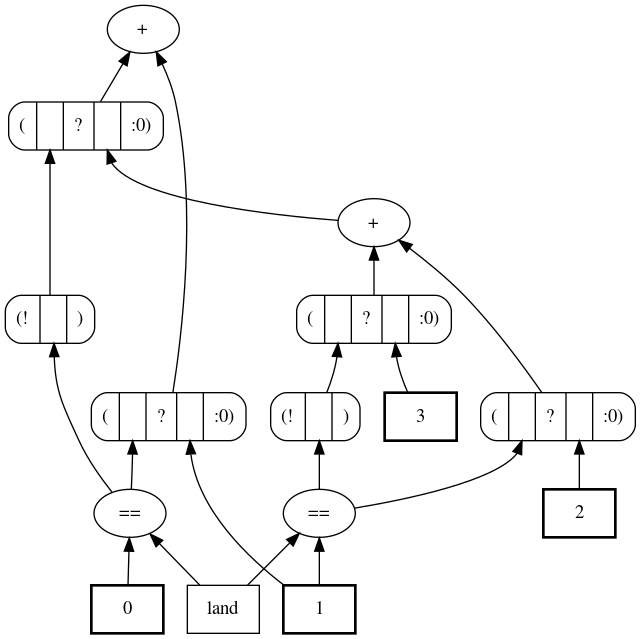

In [8]:
logic_land = ca.if_else(land == 0, 1, ca.if_else(land == 1, 2 ,3))
draw_graph(logic_land)

In [9]:
if logic_land == 1:
    CLO = 0.20
    CDO = 0.16
    CMO = 0.05
    DCDG = 0.0
    DCMG = 0.0
elif logic_land == 2:
    CLO = 1.0
    CDO = 0.08
    CMO = -0.2
    DCDG = 0.02
    DCMG = -0.05
else:
    print("Landing gear & Flaps ? ")

Landing gear & Flaps ? 


In [10]:
thr = (TSTAT + VT + DTDV) * thtl
CL = CLO + CLA * alpha
CM = DCMG + CMO + (CMA * alpha) + (CMDE * elev) + CL * (xcg - 0.25)
CD = DCDG + CDO + CDCLS * (CL ** 2)

In [19]:
xd_vec[0] = ((thr * calp - qs * CD) / MASS) - (GD * sgam)
xd_vec[1] = (-thr * salp - qs *CL + MASS * (VT * Q + GD * cgam)) / (MASS * VT + qs * CLADOT)
xd_vec[2] = Q
xd_vec[3] = 0.5 * CBAR * (CMQ * Q + CMADOT * xd_vec[1]) / VT
xd_vec[4] = VT * sgam
xd_vec[5] = VT * cgam